<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html clustering.do.txt  -->

# Clustering and Unsupervised Learning

In general terms cluster analysis, or clustering, is the task of grouping a
data-set into different distinct categories based on some measure of equality of
the data. This measure is often referred to as a **metric** or **similarity
measure** in the literature (note: sometimes we deal with a **dissimilarity
measure** instead). Usually, these metrics are formulated as some kind of
distance function between points in a high-dimensional space.

The simplest, and also the most
common is the **Euclidean distance**.

The simplest of all clustering algorithms is the  **k-means algorithm**
, sometimes also referred to as *Lloyds algorithm*. It is the simplest and also
the most common. From its simplicity it obtains both strengths and weaknesses.
These will be discussed in more detail later. The $k$-means algorithm is a
**centroid based** clustering algorithm.

Assume, we are given $n$ data points and we wish to split the data into $K < n$
different categories, or clusters. We label each cluster by an integer

$$
k\in\{1, \cdots, K \}.
$$

In the basic k-means algorithm each point is assigned to only
one cluster $k$, and these assignments are *non-injective* i.e. many-to-one. We
can think of these mappings as an encoder $k = C(i)$, which assigns the $i$-th
data-point $\bf x_i$ to the $k$-th cluster.

$k$-means algorithm in words:
1. We start with guesses / random initializations of our $k$ cluster centers/centroids

2. For each centroid the points that are most similar are identified

3. Then we move / replace each centroid with a coordinate average of all the points that were assigned to that centroid.

4. Iterate 2-3 until the centroids no longer move (to some tolerance)

We assume we have $n$ data-points

<!-- Equation labels as ordinary links -->
<div id="eq:kmeanspoints"></div>

$$
\begin{equation}\label{eq:kmeanspoints} \tag{1}
  \boldsymbol{x_i}  = \{x_{i, 1}, \cdots, x_{i, p}\}\in\mathbb{R}^p.
\end{equation}
$$

which we wish to group into $K < n$ clusters. For our dissimilarity measure we
use the *squared Euclidean distance*

<!-- Equation labels as ordinary links -->
<div id="eq:squaredeuclidean"></div>

$$
\begin{equation}\label{eq:squaredeuclidean} \tag{2}
  d(\boldsymbol{x_i}, \boldsymbol{x_i'}) = \sum_{j=1}^p(x_{ij} - x_{i'j})^2
                         = ||\boldsymbol{x_i} - \boldsymbol{x_{i'}}||^2
\end{equation}
$$

We define the so called *within-cluster point scatter* which gives us a
measure of how close each data point assigned to the same cluster tends to be to
the all the others.

<!-- Equation labels as ordinary links -->
<div id="eq:withincluster"></div>

$$
\begin{equation}\label{eq:withincluster} \tag{3}
  W(C) = \frac{1}{2}\sum_{k=1}^K\sum_{C(i)=k}
          \sum_{C(i')=k}d(\boldsymbol{x_i}, \boldsymbol{x_{i'}}) =
          \sum_{k=1}^KN_k\sum_{C(i)=k}||\boldsymbol{x_i} - \boldsymbol{\overline{x_k}}||^2
\end{equation}
$$

where $\boldsymbol{\overline{x_k}}$ is the mean vector associated with the $k$-th
cluster, and $N_k = \sum_{i=1}^nI(C(i) = k)$, where the $I()$ notation is
similar to the Kronecker delta (*Commonly used in statistics, it just means that
when $i = k$ we have the encoder $C(i)$*). In other words,  the within-cluster
scatter measures the compactness of each cluster with respect to the data points
assigned to each cluster. This is the quantity that the $k$-means algorithm aims
to minimize. We refer to this quantity $W(C)$ as the within cluster scatter
because of its relation to the *total scatter*.

We have

<!-- Equation labels as ordinary links -->
<div id="eq:totalscatter"></div>

$$
\begin{equation}\label{eq:totalscatter} \tag{4}
  T = W(C) + B(C) = \frac{1}{2}\sum_{i=1}^n
                    \sum_{i'=1}^nd(\boldsymbol{x_i}, \boldsymbol{x_{i'}})
                  = \frac{1}{2}\sum_{k=1}^K\sum_{C(i)=k}
                    \Big(\sum_{C(i') = k}d(\boldsymbol{x_i}, \boldsymbol{x_{i'}})
                  + \sum_{C(i')\neq k}d(\boldsymbol{x_i}, \boldsymbol{x_{i'}})\Big).
\end{equation}
$$

This is a quantity that is conserved throughout the $k$-means algorithm. It can
be thought of as the total amount of information in the data, and it is composed
of the aforementioned within-cluster scatter and the *between-cluster scatter*
$B(C)$. In methods such as principle component analysis the total scatter is not
conserved.

Given a cluster mean $\boldsymbol{m_k}$ we define the **total cluster variance**

<!-- Equation labels as ordinary links -->
<div id="eq:totalclustervariance"></div>

$$
\begin{equation}\label{eq:totalclustervariance} \tag{5}
  \min_{C, \{\boldsymbol{m_k}\}_1^K}\sum_{k=1}^KN_k\sum||\boldsymbol{x_i} - \boldsymbol{m_k}||^2
\end{equation}
$$

Now we have all the pieces necessary to formally revisit the $k$-means algorithm.

The $k$-means clustering algorithm goes as follows 

1. For a given cluster assignment $C$, and $k$ cluster means $\left\{m_1, \cdots, m_k\right\}$. We minimize the total cluster variance with respect to the cluster means $\{m_k\}$ yielding the means of the currently assigned clusters.

2. Given a current set of $k$ means $\{m_k\}$ the total cluster variance is minimized by assigning each observation to the closest (current) cluster mean. That is $$C(i) = \underset{1\leq k\leq K}{\mathrm{argmin}} ||\boldsymbol{x_i} - \boldsymbol{m_k}||^2$$

3. Steps 1 and 2 are repeated until the assignments do not change.

## Codes and Approaches

1. Before we start we specify a number $k$ which is the number of clusters we want to try to separate our data into.

2. We initially choose $k$ random data points in our data as our initial centroids, *or means* (this is where the name comes from).

3. Assign each data point to their closest centroid, based on the squared Euclidean distance.

4. For each of the $k$ cluster we update the centroid by calculating new mean values for all the data points in the cluster.

5. Iteratively minimize the within cluster scatter by performing steps (3, 4) until the new assignments stop changing (can be to some tolerance) or until a maximum number of iterations have passed.

Let us now program the most basic version of the algorithm using nothing but
Python with numpy arrays. This code is kept intentionally simple to gradually
progress our understanding. There is no vectorization of any kind, and even most
helper functions are not utilized.

We need first a dataset to do our cluster analysis on. In our case
this is a plain *vanilla* data set using random numbers using a
Gaussian distribution.

In [1]:
%matplotlib inline

import time
import numpy as np
import tensorflow as tf
from matplotlib import image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import display

np.random.seed(2021)

Next we define functions, for ease of use later, to generate Gaussians and to
set up our toy data set.

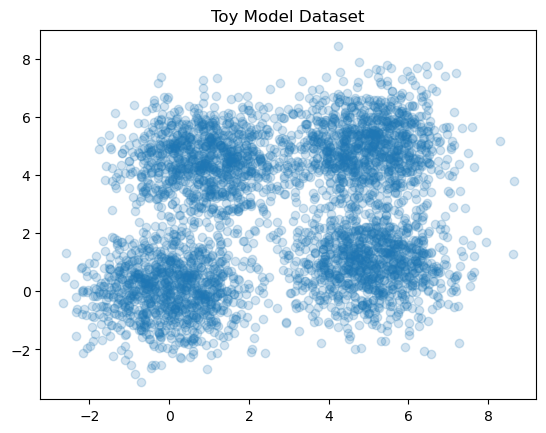

In [2]:
def gaussian_points(dim=2, n_points=1000, mean_vector=np.array([0, 0]),
                    sample_variance=1):
    """
    Very simple custom function to generate gaussian distributed point clusters
    with variable dimension, number of points, means in each direction
    (must match dim) and sample variance.

    Inputs:
        dim (int)
        n_points (int)
        mean_vector (np.array) (where index 0 is x, index 1 is y etc.)
        sample_variance (float)

    Returns:
        data (np.array): with dimensions (dim x n_points)
    """

    mean_matrix = np.zeros(dim) + mean_vector
    covariance_matrix = np.eye(dim) * sample_variance
    data = np.random.multivariate_normal(mean_matrix, covariance_matrix,
                                    n_points)
    return data



def generate_simple_clustering_dataset(dim=2, n_points=1000, plotting=True,
                                    return_data=True):
    """
    Toy model to illustrate k-means clustering
    """

    data1 = gaussian_points(mean_vector=np.array([5, 5]))
    data2 = gaussian_points()
    data3 = gaussian_points(mean_vector=np.array([1, 4.5]))
    data4 = gaussian_points(mean_vector=np.array([5, 1]))
    data = np.concatenate((data1, data2, data3, data4), axis=0)

    if plotting:
        fig, ax = plt.subplots()
        ax.scatter(data[:, 0], data[:, 1], alpha=0.2)
        ax.set_title('Toy Model Dataset')
        plt.show()


    if return_data:
        return data


data = generate_simple_clustering_dataset()

With the above dataset we start
implementing the $k$-means algorithm.

In [3]:

n_samples, dimensions = data.shape
n_clusters = 4

# we randomly initialize our centroids
np.random.seed(2021)
centroids = data[np.random.choice(n_samples, n_clusters, replace=False), :]
distances = np.zeros((n_samples, n_clusters))

# first we need to calculate the distance to each centroid from our data
for k in range(n_clusters):
    for n in range(n_samples):
        dist = 0
        for d in range(dimensions):
            dist += np.abs(data[n, d] - centroids[k, d])**2
            distances[n, k] = dist

# we initialize an array to keep track of to which cluster each point belongs
# the way we set it up here the index tracks which point and the value which
# cluster the point belongs to
cluster_labels = np.zeros(n_samples, dtype='int')

# next we loop through our samples and for every point assign it to the cluster
# to which it has the smallest distance to
for n in range(n_samples):
    # tracking variables (all of this is basically just an argmin)
    smallest = 1e10
    smallest_row_index = 1e10
    for k in range(n_clusters):
        if distances[n, k] < smallest:
            smallest = distances[n, k]
            smallest_row_index = k

    cluster_labels[n] = smallest_row_index

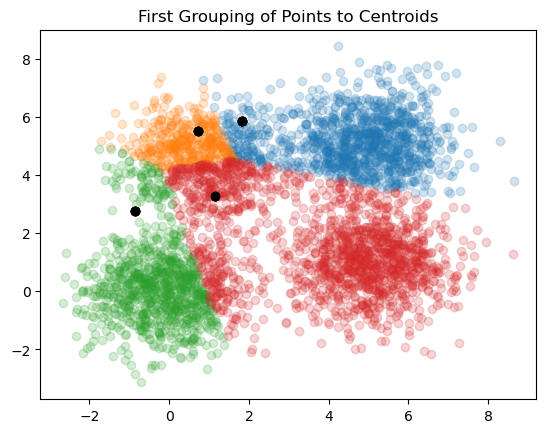

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
unique_cluster_labels = np.unique(cluster_labels)
for i in unique_cluster_labels:
    ax.scatter(data[cluster_labels == i, 0],
               data[cluster_labels == i, 1],
               label = i,
               alpha = 0.2)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black')

ax.set_title("First Grouping of Points to Centroids")

plt.show()

So what do we have so far? We have 'picked' $k$ centroids at random from our
data points. There are other ways of more intelligently choosing their
initializations, however for our purposes randomly is fine. Then we have
initialized an array 'distances' which holds the information of the distance,
*or dissimilarity*, of every point to of our centroids. Finally, we have
initialized an array 'cluster_labels' which according to our distances array
holds the information of to which centroid every point is assigned. This was the
first pass of our algorithm. Essentially, all we need to do now is repeat the
distance and assignment steps above until we have reached a desired convergence
or a maximum amount of iterations.

In [5]:

max_iterations = 100
tolerance = 1e-8

for iteration in range(max_iterations):
    prev_centroids = centroids.copy()
    for k in range(n_clusters):
        # this array will be used to update our centroid positions
        vector_mean = np.zeros(dimensions)
        mean_divisor = 0
        for n in range(n_samples):
            if cluster_labels[n] == k:
                vector_mean += data[n, :]
                mean_divisor += 1

        # update according to the k means
        centroids[k, :] = vector_mean / mean_divisor

    # we find the dissimilarity
    for k in range(n_clusters):
        for n in range(n_samples):
            dist = 0
            for d in range(dimensions):
                dist += np.abs(data[n, d] - centroids[k, d])**2
                distances[n, k] = dist

    # assign each point
    for n in range(n_samples):
        smallest = 1e10
        smallest_row_index = 1e10
        for k in range(n_clusters):
            if distances[n, k] < smallest:
                smallest = distances[n, k]
                smallest_row_index = k

        cluster_labels[n] = smallest_row_index

    # convergence criteria
    centroid_difference = np.sum(np.abs(centroids - prev_centroids))
    if centroid_difference < tolerance:
        print(f'Converged at iteration {iteration}')
        break

    elif iteration == max_iterations:
        print(f'Did not converge in {max_iterations} iterations')

Converged at iteration 5


We now have a simple , un-optimized $k$-means
clustering implementation. Lets plot the final result

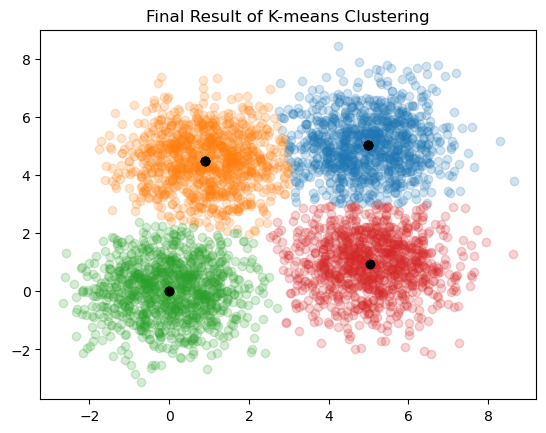

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
unique_cluster_labels = np.unique(cluster_labels)
for i in unique_cluster_labels:
    ax.scatter(data[cluster_labels == i, 0],
               data[cluster_labels == i, 1],
               label = i,
               alpha = 0.2)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black')

ax.set_title("Final Result of K-means Clustering")

plt.show()

In [7]:
def naive_kmeans(data, n_clusters=4, max_iterations=100, tolerance=1e-8):
    start_time = time.time()

    n_samples, dimensions = data.shape
    n_clusters = 4
    #np.random.seed(2021)
    centroids = data[np.random.choice(n_samples, n_clusters, replace=False), :]
    distances = np.zeros((n_samples, n_clusters))

    for k in range(n_clusters):
        for n in range(n_samples):
            dist = 0
            for d in range(dimensions):
                dist += np.abs(data[n, d] - centroids[k, d])**2
                distances[n, k] = dist

    cluster_labels = np.zeros(n_samples, dtype='int')

    for n in range(n_samples):
        smallest = 1e10
        smallest_row_index = 1e10
        for k in range(n_clusters):
            if distances[n, k] < smallest:
                smallest = distances[n, k]
                smallest_row_index = k

        cluster_labels[n] = smallest_row_index

    for iteration in range(max_iterations):
        prev_centroids = centroids.copy()
        for k in range(n_clusters):
            vector_mean = np.zeros(dimensions)
            mean_divisor = 0
            for n in range(n_samples):
                if cluster_labels[n] == k:
                    vector_mean += data[n, :]
                    mean_divisor += 1

            centroids[k, :] = vector_mean / mean_divisor

        for k in range(n_clusters):
            for n in range(n_samples):
                dist = 0
                for d in range(dimensions):
                    dist += np.abs(data[n, d] - centroids[k, d])**2
                    distances[n, k] = dist

        for n in range(n_samples):
            smallest = 1e10
            smallest_row_index = 1e10
            for k in range(n_clusters):
                if distances[n, k] < smallest:
                    smallest = distances[n, k]
                    smallest_row_index = k

            cluster_labels[n] = smallest_row_index

        centroid_difference = np.sum(np.abs(centroids - prev_centroids))
        if centroid_difference < tolerance:
            print(f'Converged at iteration {iteration}')
            print(f'Runtime: {time.time() - start_time} seconds')

            return cluster_labels, centroids

    print(f'Did not converge in {max_iterations} iterations')
    print(f'Runtime: {time.time() - start_time} seconds')

    return cluster_labels, centroids